## 业务场景

我们有员工的各种统计信息，以及该员工是否已经离职，统计的信息包括了（工资、出差、工作环境满意度、工作投入度、是否加班、是否升职、工资提升比例等）现在需要你来通过训练数据得出 员工离职预测。

|字段|解释|含义
--|--|--
Age|	员工年龄
Attrition|	员工是否已经离职|Yes表示离职，No表示未离职
BusinessTravel|	商务差旅频率|Non-Travel不出差，TravelRarely不经常出差，TravelFrequently经常出差
DailyRate|	平均每日工资
Department|	员工所在部门|Sales销售部，Research & Development研发部，HumanResources人力资源部	
DistanceFromHome|	公司跟家庭住址的距离|从1到29，1表示最近，29表示最远
Education|	员工的教育程度|从1到5，5表示教育程度最高
EducationField|	员工所学习的专业领域|Life Sciences表示生命科学，Medical表示医疗，Marketing表示市场营销，Technical Degree表示技术学位，Human Resources表示人力资源，Other表示其他
EmployeeNumber|	员工号码
EnvironmentSatisfaction|	员工对于工作环境的满意程度|从1到4，1的满意程度最低，4的满意程度最高
Gender|	员工性别|Male表示男性，Female表示女性
JobInvolvement|	员工工作投入度|从1到4，1为投入度最低，4为投入度最高
JobLevel|	职业级别|从1到5，1为最低级别，5为最高级别
JobRole|	工作角色|Sales Executive销售主管，Research Scientist科学研究员，Laboratory Technician实验室技术员，Manufacturing Director制造总监，Healthcare Representative医疗代表，Manager经理，Sales Representative销售代表，Research Director研究总监，Human Resources人力资源
JobSatisfaction|	工作满意度|从1到4，1代表满意度最低，4代表最高
MaritalStatus|	员工婚姻状况|Single单身，Married已婚，Divorced离婚
MonthlyIncome|	员工月收入|范围在1009到19999之间
NumCompaniesWorked|	员工曾经工作过的公司数
Over18|	年龄是否超过18岁
OverTime|	是否加班|Yes表示加班，No表示不加班
PercentSalaryHike|	工资提高的百分比
PerformanceRating|	绩效评估
RelationshipSatisfaction|	关系满意度|从1到4，1表示满意度最低，4表示满意度最高
StandardHours|	标准工时
StockOptionLevel|	股票期权水平
TotalWorkingYears|	总工龄
TrainingTimesLastYear|	上一年的培训时长|从0到6，0表示没有培训，6表示培训时间最长
WorkLifeBalance|	工作与生活平衡程度|从1到4，1表示平衡程度最低，4表示平衡程度最高
YearsAtCompany|	在目前公司工作年数
YearsInCurrentRole|	在目前工作职责的工作年数
YearsSinceLastPromotion|	距离上次升职时长
YearsWithCurrManager|	跟目前的管理者共事年数

In [85]:
from itertools import product
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
plt.rcParams['font.sans-serif'] = ['SimHei']

## 数据获取

In [2]:
df_train = pd.read_csv('./train.csv')
df_train['train_or_test'] = 1
df_train.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,train_or_test
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,80,1,29,2,2,1,0,0,0,1
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,80,1,8,3,3,5,4,0,3,1
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,...,80,1,8,3,2,7,7,7,5,1
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,80,0,10,1,3,10,7,0,9,1
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,80,0,1,4,3,1,0,1,0,1


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   1176 non-null   int64 
 1   Age                       1176 non-null   int64 
 2   Attrition                 1176 non-null   object
 3   BusinessTravel            1176 non-null   object
 4   DailyRate                 1176 non-null   int64 
 5   Department                1176 non-null   object
 6   DistanceFromHome          1176 non-null   int64 
 7   Education                 1176 non-null   int64 
 8   EducationField            1176 non-null   object
 9   EmployeeCount             1176 non-null   int64 
 10  EmployeeNumber            1176 non-null   int64 
 11  EnvironmentSatisfaction   1176 non-null   int64 
 12  Gender                    1176 non-null   object
 13  HourlyRate                1176 non-null   int64 
 14  JobInvolvement          

In [4]:
df_test = pd.read_csv('./test.csv')
df_test['train_or_test'] = 0
df_test.head()

,user_id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,train_or_test
0,442,36,Non-Travel,635,Sales,10,4,Medical,1,592,...,80,0,10,3,2,10,3,9,7,0
1,1091,33,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,1545,...,80,0,5,2,3,5,3,0,2,0
2,981,35,Travel_Frequently,662,Sales,18,4,Marketing,1,1380,...,80,1,5,0,2,4,2,3,2,0
3,785,40,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,1092,...,80,1,14,6,3,11,10,11,1,0
4,1332,29,Travel_Frequently,459,Research & Development,24,2,Life Sciences,1,1868,...,80,0,1,3,2,1,0,1,0,0


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   294 non-null    int64 
 1   Age                       294 non-null    int64 
 2   BusinessTravel            294 non-null    object
 3   DailyRate                 294 non-null    int64 
 4   Department                294 non-null    object
 5   DistanceFromHome          294 non-null    int64 
 6   Education                 294 non-null    int64 
 7   EducationField            294 non-null    object
 8   EmployeeCount             294 non-null    int64 
 9   EmployeeNumber            294 non-null    int64 
 10  EnvironmentSatisfaction   294 non-null    int64 
 11  Gender                    294 non-null    object
 12  HourlyRate                294 non-null    int64 
 13  JobInvolvement            294 non-null    int64 
 14  JobLevel                  

## 数据探索

### 标签分布

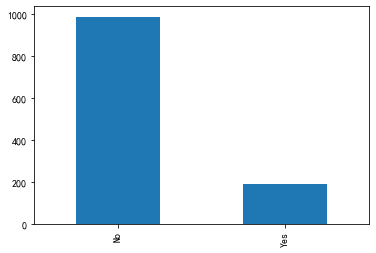

In [6]:
df_train['Attrition'].value_counts().plot.bar()
plt.show()

### 连续变量分布

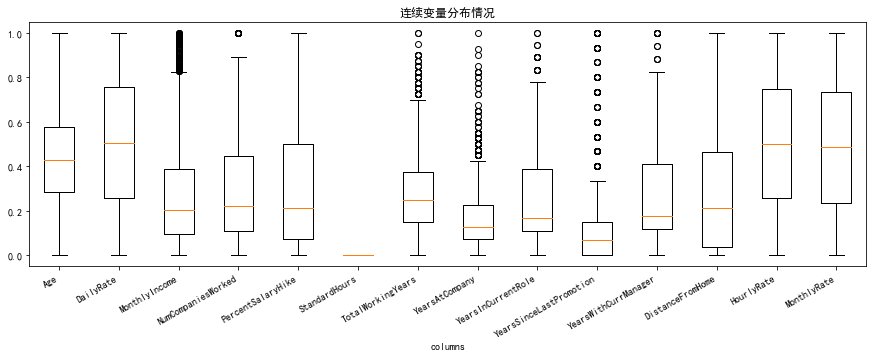

In [7]:
check_columns_1 = ['Age','DailyRate','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 
                 'StandardHours', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole',
                'YearsSinceLastPromotion', 'YearsWithCurrManager','DistanceFromHome', 'HourlyRate',
                  'MonthlyRate',]
min_max_value = MinMaxScaler().fit_transform(df_train[check_columns_1].values)
fig = plt.figure(figsize=(15,5))
plt.boxplot(min_max_value, labels=check_columns_1,)
plt.xlabel('columns')
plt.title('连续变量分布情况')
fig.autofmt_xdate()
plt.show()

### 相关程度

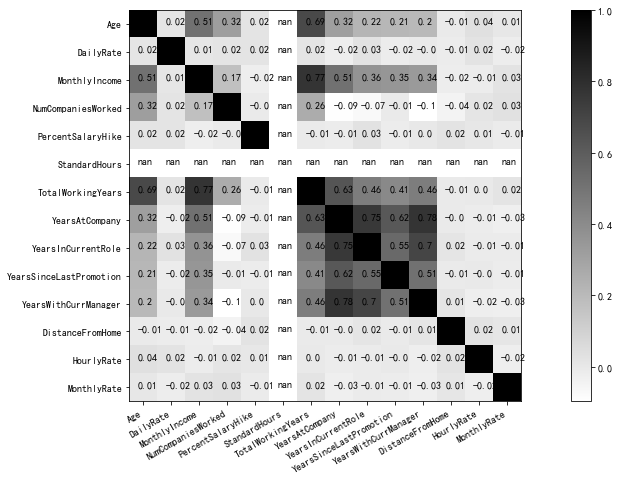

In [8]:
fig = plt.figure(figsize=(18,8))
corr_array = df_train[check_columns_1].corr().values
plt.imshow(corr_array, cmap='binary')
plt.xticks([x for x in range(len(check_columns_1))], check_columns_1)
plt.yticks([x for x in range(len(check_columns_1))], check_columns_1)
for x, y in product([x for x in range(len(check_columns_1))], repeat=2):
    plt.text(x-0.2,y,round(corr_array[x,y],2),)  
plt.colorbar()
fig.autofmt_xdate()
plt.show()

## 数据预处理

In [77]:
# 合并训练集测试集
df_all = pd.concat([df_train, df_test], axis=0)

# 标签处理 -> yes:1, no:0
df_labels = df_train['Attrition'].map({'Yes':1, 'No':0})

In [78]:
# 删除不需要的特征
features = [x for x in df_train.columns if x not in [
    'Attrition', 'EmployeeNumber','user_id', 'StandardHours', 'Over18']]
df_deal = df_all[features]

# 离散变量独热编码处理
one_hot_list = [x for x in features if x not in check_columns_1+['train_or_test']]
for column in one_hot_list:
    df_dum = pd.get_dummies(df_deal[column], prefix=column)
    df_deal = pd.concat([df_deal, df_dum], axis=1)
    df_deal = df_deal.drop(column, axis=1)

# # 离散变量自然数编码处理
# int_list = [x for x in features if x not in check_columns_1+['train_or_test']]
# for column in int_list:
#     df_deal[column] = pd.factorize(df_deal[column])[0].tolist()

In [80]:
处理连续变量outliers值
outlier_columns = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 

for column in outlier_columns:
    Q1 = df_deal[column].quantile(0.25)
    Q3 = df_deal[column].quantile(0.75)
    IQR = Q3 - Q1
    up_limit = Q3 + 1.5 * IQR
    df_deal[column] = df_deal[column].apply(lambda x: up_limit if x > up_limit else x)

In [98]:
# 数据集测试集拆分
df_train_pre = df_deal.query('train_or_test == 1')
df_train_pre = df_train_pre.drop('train_or_test', axis=1)
df_test_pre =  df_deal.query('train_or_test == 0')
df_test_pre = df_test_pre.drop('train_or_test', axis=1)

# 数据标准化
train_features = StandardScaler().fit_transform(df_train_pre.values)
test_features = StandardScaler().fit_transform(df_test_pre.values)

## 训练集评估集拆分

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    train_features, df_labels, test_size=0.33, random_state=529, )

## 模型选择

In [87]:
models = {'dtree': DecisionTreeClassifier(), 
          'rtree': RandomForestClassifier(), 
          'svm': SVC(), 
          'knn': KNeighborsClassifier(), 
          'logr': LogisticRegression(),
          'bnb': BernoulliNB(),
          'ridge': RidgeClassifier(),
          'ada': AdaBoostClassifier()
         }

df = pd.DataFrame(index=['f1_score', 'precision', 'recall', 'accuracy', 'roc_auc'])
for clf in models:
    score_f1 = cross_val_score(models[clf], X_train, y_train, cv=5, scoring='f1').mean()
    score_pr = cross_val_score(models[clf], X_train, y_train, cv=5, scoring='precision').mean()
    score_re = cross_val_score(models[clf], X_train, y_train, cv=5, scoring='recall').mean()
    score_ac = cross_val_score(models[clf], X_train, y_train, cv=5, scoring='accuracy').mean()
    score_auc = cross_val_score(models[clf], X_train, y_train, cv=5, scoring='roc_auc').mean()
    df[clf] = np.round(np.array([score_f1, score_pr, score_re, score_ac, score_auc]),2)
df

,dtree,rtree,svm,knn,logr,bnb,ridge,ada
f1_score,0.32,0.17,0.16,0.19,0.55,0.52,0.45,0.42
precision,0.35,0.93,0.87,0.71,0.67,0.50,0.86,0.53
recall,0.34,0.13,0.09,0.11,0.46,0.54,0.31,0.35
accuracy,0.79,0.86,0.86,0.85,0.88,0.84,0.88,0.85
roc_auc,0.60,0.80,0.82,0.69,0.82,0.80,0.81,0.77


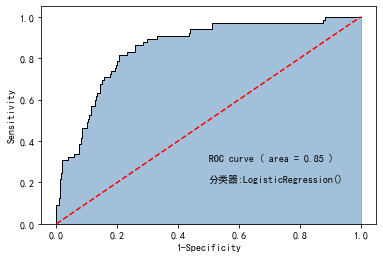

In [92]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
predict = clf.predict(X_test)

# ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
auc(fpr, tpr)
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
plt.text(0.5,0.3,'ROC curve ( area = {} )'.format(round(roc_auc,2)))
plt.text(0.5,0.2,'分类器:{}'.format(clf))
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

## 预测

In [99]:
predict = clf.predict(test_features)

In [108]:
clf.predict_proba(test_features)[:,1]

array([4.96364192e-02, 2.49202763e-02, 4.07383165e-01, 2.99384357e-01,
       5.99048355e-01, 1.33043253e-02, 1.46581544e-01, 1.41487197e-02,
       2.62962892e-04, 2.83428317e-01, 8.06396928e-03, 1.99700321e-01,
       1.51148850e-02, 7.77147596e-01, 5.88668919e-02, 1.19207449e-03,
       4.28459009e-02, 6.51984040e-03, 3.61142291e-01, 1.68330690e-01,
       1.19311407e-01, 5.79773626e-02, 7.20421914e-03, 1.07524378e-02,
       3.49718966e-01, 3.89378912e-01, 1.62189300e-01, 8.49037702e-02,
       7.70230046e-01, 1.19059272e-02, 7.85644878e-03, 4.28013183e-02,
       3.51851878e-01, 4.95837309e-01, 2.28135247e-02, 3.33221756e-04,
       2.29142332e-02, 1.08292104e-01, 7.20068019e-02, 1.91114842e-01,
       1.71434571e-03, 4.01640022e-02, 3.51616583e-04, 2.17076402e-02,
       2.50108436e-02, 6.57801345e-01, 5.32882237e-01, 1.42792925e-04,
       2.27285144e-01, 1.24141622e-01, 4.95258992e-03, 4.94008410e-01,
       3.23410646e-02, 6.68138721e-02, 5.76519140e-01, 9.52799330e-02,
      

In [111]:
df_test['Attrition'] = clf.predict_proba(test_features)[:,1]

In [113]:
df_finall = df_test[['user_id', 'Attrition']]

In [115]:
df_finall.to_csv('./predict.csv')